In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
%matplotlib inline

In [73]:
df = pd.read_csv('/Users/jdobrow/Desktop/ESSdata_Thinkful.txt')

In [74]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [75]:
df = df.fillna(method='ffill')

In [76]:
first_df = df[df.year == 6]
second_df = df[df.year == 7]

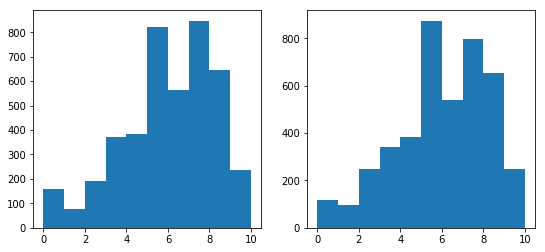

Ttest_relResult(statistic=0.0957107950847059, pvalue=0.923754731138101)


In [77]:
# 1. Trust
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].hist(first_df.ppltrst)
axes[1].hist(second_df.ppltrst)
plt.show()
print(stats.ttest_rel(first_df.ppltrst, second_df.ppltrst, nan_policy='omit'))
# Looks like we can NOT conclusively say that there was a change in the amount of trust people had
# from 2012 to 2014

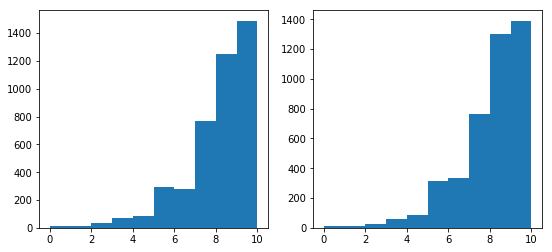

WilcoxonResult(statistic=3327591.5, pvalue=0.8817689135415069)


In [78]:
# 2. Happy. This one does not look normal at all.
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].hist(first_df.happy)
axes[1].hist(second_df.happy)
plt.show()
print(stats.wilcoxon(first_df.ppltrst, second_df.ppltrst))
# Not significant result again.

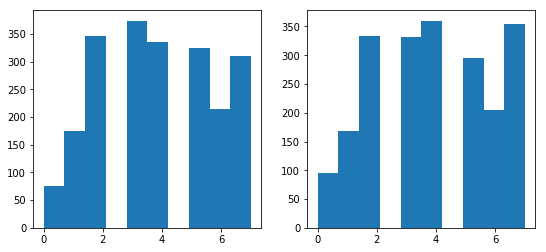

MannwhitneyuResult(statistic=2279328.0, pvalue=0.23796364318747015)


In [79]:
# 3. TV Time between men and women. Not normally distributed and independent
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].hist(first_df.tvtot[first_df.gndr == 1]) # Male
axes[1].hist(first_df.tvtot[first_df.gndr == 2]) # Female
plt.show()
print(stats.mannwhitneyu(first_df.tvtot[first_df.gndr == 1], first_df.tvtot[first_df.gndr == 2]))
# No significant Difference

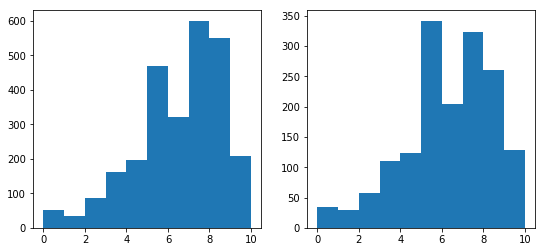

Ttest_indResult(statistic=3.3401680519075074, pvalue=0.0008444215602503932)
Lives with Partner Mean:  6.079880552444942
No Partner Mean:  5.855377008652658


In [80]:
# 4. Believe people were fair
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].hist(first_df.pplfair[first_df.partner == 1]) # Yes Partner
axes[1].hist(first_df.pplfair[first_df.partner == 2]) # No Partner
plt.show()
print(stats.ttest_ind(first_df.pplfair[first_df.partner == 1], first_df.pplfair[first_df.partner == 2], nan_policy='omit'))
print('Lives with Partner Mean: ', np.mean(first_df.pplfair[first_df.partner == 1]))
print('No Partner Mean: ', np.mean(first_df.pplfair[first_df.partner == 2]))
# People with partners believe that people are fair

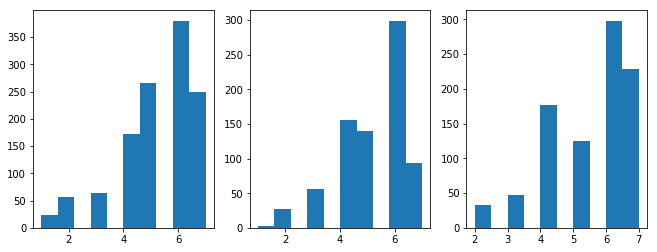

F_onewayResult(statistic=7.868880855006757, pvalue=0.0003907118132093085)
Spain Mean:  5.2572135201978565
Switzerland Mean:  5.161707632600259
Sweden Mean:  5.426211453744493


In [82]:
# 5. compare counries by social activity
f, axes = plt.subplots(1, 3, figsize=(11,4))
axes[0].hist(second_df.sclmeet[second_df.cntry == 'ES']) # Spain
axes[1].hist(second_df.sclmeet[second_df.cntry == 'CH']) # Switzerland
axes[2].hist(second_df.sclmeet[second_df.cntry == 'SE'])# Sweden
plt.show()
print(stats.f_oneway(second_df.sclmeet[second_df.cntry == 'ES'], second_df.sclmeet[second_df.cntry == 'CH'], second_df.sclmeet[second_df.cntry == 'SE']))
print('Spain Mean: ', np.mean(second_df.sclmeet[second_df.cntry == 'ES']))
print('Switzerland Mean: ', np.mean(second_df.sclmeet[second_df.cntry == 'CH']))
print('Sweden Mean: ', np.mean(second_df.sclmeet[second_df.cntry == 'SE']))
# Looks to be normal-ish, going to try ANOVA

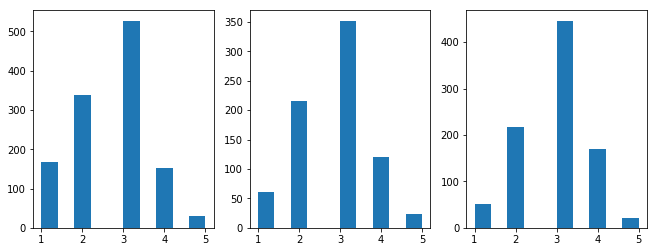

F_onewayResult(statistic=22.728138353978874, pvalue=1.607279381005182e-10)
Spain Mean:  2.6166529266281944
Switzerland Mean:  2.7826649417852525
Sweden Mean:  2.881057268722467


In [83]:
# 5. compare counries by social activity
f, axes = plt.subplots(1, 3, figsize=(11,4))
axes[0].hist(second_df.sclact[second_df.cntry == 'ES']) # Spain
axes[1].hist(second_df.sclact[second_df.cntry == 'CH']) # Switzerland
axes[2].hist(second_df.sclact[second_df.cntry == 'SE'])# Sweden
plt.show()
print(stats.f_oneway(second_df.sclact[second_df.cntry == 'ES'], second_df.sclact[second_df.cntry == 'CH'], second_df.sclact[second_df.cntry == 'SE']))
print('Spain Mean: ', np.mean(second_df.sclact[second_df.cntry == 'ES']))
print('Switzerland Mean: ', np.mean(second_df.sclact[second_df.cntry == 'CH']))
print('Sweden Mean: ', np.mean(second_df.sclact[second_df.cntry == 'SE']))
# Looks to be normal-ish, going to try ANOVA